# Group 4: Gabriel Mok, Ramy Elmallah, Sari Daniel Tarabay

## Link to Google Colab Notebook:

https://colab.research.google.com/drive/1YNEwKZSlpJfP2BNAS86Y62EatBynG2-Z?usp=sharing

# 0. Imports

In [ ]:
import math
import matplotlib.pyplot as plt
import random
import time

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]

# 1.1. MDP Implementation

## 1.1.1
The state names are shown below

| <!-- -->  | <!-- -->  | <!-- -->  | <!-- -->  |
|----|----|----|----|
| 0  | 1  | 2  | 3  |
| 4  | 5  | 6  | 7  |
| 8  | 9  | 10 | 11 |
| 12 | 13 | 14 | 15 |

### a)
The state space includes all states: $\mathcal{S} \in [0, 15]$

The action space is as follows

|State| Up  |Right|Down |Left |
|-----|-----|-----|-----|-----|
|0    |     |x    |x    |     |
|1    |     |x    |x    |x    |
|2    |     |x    |x    |x    |
|3    |     |     |x    |x    |
|4    |x    |x    |x    |     |
|5    |     |     |     |     |
|6    |x    |x    |x    |x    |
|7    |     |     |     |     |
|8    |x    |x    |x    |     |
|9    |x    |x    |x    |x    |
|10   |x    |x    |x    |x    |
|11   |     |     |     |     |
|12   |     |     |     |     |
|13   |x    |x    |     |x    |
|14   |x    |x    |     |x    |
|15   |     |     |     |     |

### b)
|    | Left | Up                            | Right                             | Down                             |
|----|----|----------------------------------|----------------------------------|----------------------------------|
|0| |  | P(1)=2/3<br>P(4)=1/3<br> | P(1)=1/3<br>P(4)=2/3<br> | 
|1|P(0)=2/3<br>P(2)=1/6<br>P(5)=1/6<br> |  | P(0)=1/6<br>P(2)=2/3<br>P(5)=1/6<br> | P(0)=1/6<br>P(2)=1/6<br>P(5)=2/3<br> | 
|2|P(1)=2/3<br>P(3)=1/6<br>P(6)=1/6<br> |  | P(1)=1/6<br>P(3)=2/3<br>P(6)=1/6<br> | P(1)=1/6<br>P(3)=1/6<br>P(6)=2/3<br> | 
|3|P(2)=2/3<br>P(7)=1/3<br> |  |  | P(2)=1/3<br>P(7)=2/3<br> | 
|4| | P(0)=2/3<br>P(5)=1/6<br>P(8)=1/6<br> | P(0)=1/6<br>P(5)=2/3<br>P(8)=1/6<br> | P(0)=1/6<br>P(5)=1/6<br>P(8)=2/3<br> | 
|5| |  |  |  | 
|6|P(2)=1/9<br>P(5)=2/3<br>P(7)=1/9<br>P(10)=1/9<br> | P(2)=2/3<br>P(5)=1/9<br>P(7)=1/9<br>P(10)=1/9<br> | P(2)=1/9<br>P(5)=1/9<br>P(7)=2/3<br>P(10)=1/9<br> | P(2)=1/9<br>P(5)=1/9<br>P(7)=1/9<br>P(10)=2/3<br> | 
|7| |  |  |  | 
|8| | P(4)=2/3<br>P(9)=1/6<br>P(12)=1/6<br> | P(4)=1/6<br>P(9)=2/3<br>P(12)=1/6<br> | P(4)=1/6<br>P(9)=1/6<br>P(12)=2/3<br> | 
|9|P(5)=1/9<br>P(8)=2/3<br>P(10)=1/9<br>P(13)=1/9<br> | P(5)=2/3<br>P(8)=1/9<br>P(10)=1/9<br>P(13)=1/9<br> | P(5)=1/9<br>P(8)=1/9<br>P(10)=2/3<br>P(13)=1/9<br> | P(5)=1/9<br>P(8)=1/9<br>P(10)=1/9<br>P(13)=2/3<br> | 
|10|P(6)=1/9<br>P(9)=2/3<br>P(11)=1/9<br>P(14)=1/9<br> | P(6)=2/3<br>P(9)=1/9<br>P(11)=1/9<br>P(14)=1/9<br> | P(6)=1/9<br>P(9)=1/9<br>P(11)=2/3<br>P(14)=1/9<br> | P(6)=1/9<br>P(9)=1/9<br>P(11)=1/9<br>P(14)=2/3<br> | 
|11| |  |  |  | 
|12| |  |  |  | 
|13|P(9)=1/6<br>P(12)=2/3<br>P(14)=1/6<br> | P(9)=2/3<br>P(12)=1/6<br>P(14)=1/6<br> | P(9)=1/6<br>P(12)=1/6<br>P(14)=2/3<br> |  | 
|14|P(10)=1/6<br>P(13)=2/3<br>P(15)=1/6<br> | P(10)=2/3<br>P(13)=1/6<br>P(15)=1/6<br> | P(10)=1/6<br>P(13)=1/6<br>P(15)=2/3<br> |  | 
|15| |  |  |  | 

### c)
**Sparse Reward:** The agent gets a reward of 0 in every transition and only gets a reward of 1 when it reaches the goal (state 15). \\
The sparse reward is devised to ensure that the agent is only receiving a binary reward with the positive reward only when it reaches the goal state

**Dense Reward:** The agent gets a reward of -1 in every transition except when it falls where the agent gets a reward of -10. \\
This dense reward is based on penalizing the agent for spending time (to motivate it to reach the goal faster and end the episode). In order to demotivate the agent from endingthe episode fast by falling, we penalize falling with a large negative reward.

## 1.1.2 Optimized Bellman Equation

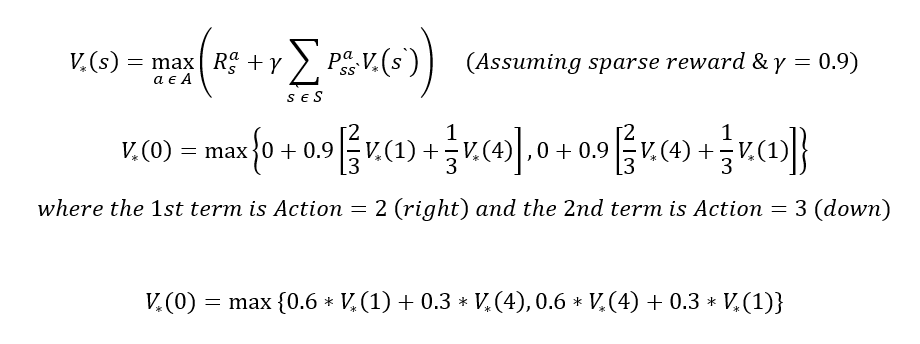

## 1.1.3 Optimal Policy

The optimal policy would be to choose the actions that would likely (due to the stochastic nature of the enviornment) lead to getting closer to the goal. For example, and while assming a determinstic environment for simplicity, in state 0, the optimal policy would choose action down and so is the case for state 4 and then in state 8, action right should be chosen and so is the case for state 9, and then in state 10 action down should be chosen before chooseing action right in state 11 to reach the goal. The described policy is just one option out of potentially multiple optimal policies. As the environment is stochastic, the optimal policy will try to reduce the number of steps needed to reach the target while reducing the risk of falling into a hole terminal state.

## 1.1.4 Frozen Lake MDP Code Implementation

In [ ]:
class ActionNotAllowed(Exception):
  pass

In [ ]:
class FrozenLakeEnv:
    def __init__(self):
      self.terminal_states = [5,7,11,12,15]
      self.goal_state = 15

    # return the initial state of this MDP ...
    def reset(self):
        self.current_state = 0
        return self.current_state
        # self.total_reward = 0

    def action_name(self, action_index):
      mapping = ['left', 'up', 'right', 'down']
      return mapping[action_index]

    # return a list containing all the possible states in this MDP
    def states_space(self):
        return list(range(16))
    
    # return a list containing all the possible actions corresponding to the given state
    def actions_space(self, state):
        if state in self.terminal_states:
          return []

        col = state % 4
        row = state // 4
        allowed_actions = list(range(4))
        if row == 0:
          allowed_actions.remove(1)
        elif row == 3:
          allowed_actions.remove(3)
        if col == 0:
          allowed_actions.remove(0)
        elif col == 3:
          allowed_actions.remove(2)

        return allowed_actions  

    # sparse reward function
    def sparse_reward(self, state, action, next_state): # return R(s, a, s’) 
        if next_state != self.goal_state:
          return 0
        return 1

    # dense reward function
    def dense_reward(self, state, action, next_state): # return R(s, a, s’)
        if next_state in self.terminal_states and next_state != self.goal_state:
          return -10
        return -1

    # transition probability function
    def pr(self, state, action, next_state): # return P(s’ | s, a)
        def get_state_num(row, col):
          return row*4+col
        def get_new_state(action, row, col):
          if action == 1:
            return get_state_num(row-1, col)
          elif action == 2:
            return get_state_num(row, col+1)
          elif action == 3:
            return get_state_num(row+1, col)
          elif action == 0:
            return get_state_num(row, col-1)

        col = state % 4
        row = state // 4

        allowed_actions = self.actions_space(state)        
        if action not in allowed_actions:
          raise ActionNotAllowed

        slip_states = []
        for allowed_action in allowed_actions:
          if allowed_action == action:
            continue
          slip_states.append(get_new_state(allowed_action, row, col))

        ideal_state = get_new_state(action, row, col)

        if next_state == ideal_state:
          return 2/3
        elif next_state in slip_states:
          return (1/3)/len(slip_states)
        else:
          return 0   
    
    # performs the given action in the MDP
    # returns next_state, sparse_reward, dense_reward, terminated
    def step(self, action):
        if action not in self.actions_space(self.current_state):
          raise ActionNotAllowed

        # sample the next state according to the action and transition probs
        probs = [self.pr(self.current_state, action, next_state) for next_state in self.states_space()]
        next_state = random.choices(self.states_space(), weights=probs)[0]
        current_state = self.current_state
        self.current_state = next_state
        return next_state, \
                self.sparse_reward(current_state, action, next_state), \
                self.dense_reward(current_state, action, next_state), \
                next_state in self.terminal_states


In [ ]:
# Code to generate the transition probabilities table for Section 1.1.1.b
from fractions import Fraction
lake = FrozenLakeEnv()
for state in range(0, 16):
  print(f'|{state}|', end ='')
  for action in range(4):
    for next_state in range(0, 16):
      try:
        prob = lake.pr(state, action, next_state)
        if prob != 0:
          print(f"P({next_state})={Fraction(prob).limit_denominator()}<br>", end='')
      except ActionNotAllowed:
        pass
    print(' | ', end='')
  print("")

# 1.2. Policy Iteration Implementation

## 1.2.1 Policy Iteration Algorithm

In [ ]:
class PolicyIteration:
    def __init__(self, env , gamma, reward_type='dense', verbose=True):
        # initialize the domain and discount factor 
        self.env = env
        self.gamma = gamma
        self.reward_type = reward_type
        self.verbose = verbose
        self.history = []
        self.reward_function = self.env.dense_reward if reward_type=='dense' else self.env.sparse_reward
        self.timestamps = []
        self.num_iterations = 0

    #### need to call this to have a self.pi
    def initialize_policy(self):
        # policy iteration also requires to maintain a policy
        # initialize the policy pi_0[s] = 0 (LEFT) for all states and the value function V_0[s] = 0
        # recommend to implement the policy (self.pi) as a dictionary that maps states to actions in {LEFT, UP, RIGHT, DOWN}
    
        self.Pi_old = {}
        self.Pi = {state:random.choice(self.env.actions_space(state)) \
                   if state not in self.env.terminal_states else 0 for state in self.env.states_space()}


    # you can use the corresponding procedure you defined in ValueIteration
    def initialize_values(self):
        self.V_old = {}
        self.V = {state:0 for state in self.env.states_space()}


    def compute_backup(self, state, action):
        # you can use the corresponding procedure you defined in ValueIteration
        # E{R(s, a, S’) + gamma * V_k[S’]}

        backup = [self.env.pr(state, action, next_state)*(self.reward_function(state, action, next_state) + self.gamma*self.V_old[next_state]) \
          for next_state in self.env.states_space()]

        return sum(backup)


    def greedy_action(self, state):
        # use the previous function compute_backup to return the ( # deterministic) greedy action a* = pi[s] derived from V 
        buffer = []
        for action in self.env.actions_space(state):
          buffer.append((action, self.compute_backup(state, action)))
        return max(buffer, key=lambda x: x[1])

    
    def policy_evaluation_step(self, state): ## helper function for policy_evaluation
        # use this function to implement the policy evaluation
        # step for one iteration, 
        # e.g. return the value V_{k+1}[s] = E[R(s, pi[s], S’) + gamma * V_k[S’]] # you should not modify self.V
        return self.compute_backup(state, self.Pi[state])


    ## how can this ever converge?
    def policy_evaluation(self, tolerance=1e-3):
      delta = float('inf')
      while delta > tolerance:
        delta = 0
        self.history.append(self.V.copy())
        self.V_old = self.V.copy()
        for state in self.env.states_space():
          if state in self.env.terminal_states:
            continue
          self.V[state] = self.policy_evaluation_step(state)
          delta = max(delta, abs(self.V[state]-self.V_old[state]))

        # in policy evaluation, we solve V = P * (R + gamma * V) for a fixed policy by iterating 
        # V_{k+1}[s] = E[R(s, pi[ s], S’) + gamma * V_k[S’]] for each state s until V_k converges uniformly
        # use this method to perform the necessary iterations until V_k[s] (self.V) converges to within the specified tolerance
        # this procedure should not return a value, but should modify self.V ...

            
    def policy_improvement(self):
        # implement the procedure here for policy improvement, 
        # e.g. pi_{k+1}[s] = argmax_a E[R(s, a, S’) + gamma * V_k[S]]
        
        policy_stable = True
        self.Pi_old = self.Pi.copy()
        for state in self.env.states_space():
          if state in self.env.terminal_states:
            continue
          self.Pi[state] = self.greedy_action(state)[0]
          if self.Pi_old[state] != self.Pi[state]:
            policy_stable = False
        return policy_stable


    def run_iteration(self):
        # implement the complete policy iteration algorithm using the procedures you defined earlier
        # your method should include initialization of the policy and value function, 
        # and perform each iteration of policy iteration , 
        # which includes policy evaluation followed by improvement, until the policy no longer improves
        # you should perform monitoring and plotting the value function at the initial state, 
        # store , and when converged plot , the backed -up value
        # function at the initial state of the MDP according to
        # the greedy policy derived from V_k as a function of k
        # also, print the final greedy policy in the console ...
      start_time = time.time()

      self.initialize_values()
      self.initialize_policy()

      policy_stable = False
      while not policy_stable:
        self.policy_evaluation()
        policy_stable = self.policy_improvement()
        self.num_iterations += 1
        self.timestamps.append(time.time() - start_time)

      end_time = time.time()
      print(f"The ({self.reward_type}, {self.gamma}) algorithm took {end_time-start_time} seconds.")

      if self.verbose:
        plt.plot(range(len(self.history)), [x[0] for x in self.history], label=f"Gamma {self.gamma}")
        plt.title('Policy Evaluation Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Value')
        for state in self.env.states_space():
          if state in self.env.terminal_states:
            continue
          print(f'pi({state}) = {self.env.action_name(self.greedy_action(state)[0])}')
        print(f"The algorithm converged in {self.num_iterations} policy iterations.")

## 1.2.2 

Reward Type is sparse, Gamma is 0.9
The (sparse, 0.9) algorithm took 0.030680179595947266 seconds.
pi(0) = down
pi(1) = right
pi(2) = down
pi(3) = left
pi(4) = down
pi(6) = down
pi(8) = right
pi(9) = right
pi(10) = down
pi(13) = right
pi(14) = right
The algorithm converged in 3 policy iterations.
-=-=-=-=-=-=-=-=-=-=-=-

Reward Type is sparse, Gamma is 0.99
The (sparse, 0.99) algorithm took 0.047811031341552734 seconds.
pi(0) = down
pi(1) = right
pi(2) = down
pi(3) = left
pi(4) = down
pi(6) = down
pi(8) = right
pi(9) = right
pi(10) = down
pi(13) = right
pi(14) = right
The algorithm converged in 4 policy iterations.
-=-=-=-=-=-=-=-=-=-=-=-



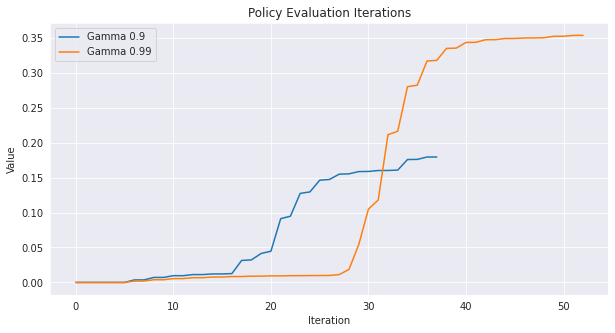

Reward Type is dense, Gamma is 0.9
The (dense, 0.9) algorithm took 0.05892157554626465 seconds.
pi(0) = down
pi(1) = right
pi(2) = down
pi(3) = left
pi(4) = down
pi(6) = down
pi(8) = right
pi(9) = right
pi(10) = down
pi(13) = right
pi(14) = right
The algorithm converged in 3 policy iterations.
-=-=-=-=-=-=-=-=-=-=-=-

Reward Type is dense, Gamma is 0.99
The (dense, 0.99) algorithm took 0.08389019966125488 seconds.
pi(0) = down
pi(1) = down
pi(2) = down
pi(3) = down
pi(4) = down
pi(6) = down
pi(8) = right
pi(9) = right
pi(10) = down
pi(13) = right
pi(14) = right
The algorithm converged in 6 policy iterations.
-=-=-=-=-=-=-=-=-=-=-=-



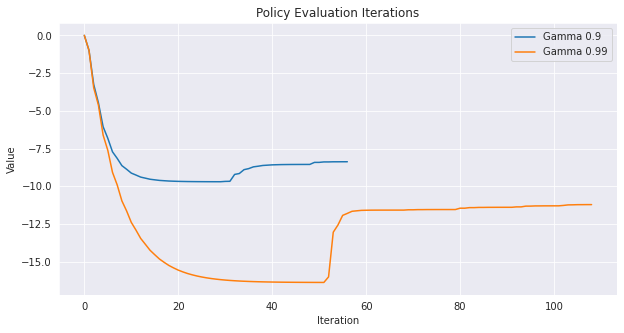

In [ ]:
env = FrozenLakeEnv()
for reward_type in ['sparse', 'dense']:
  plt.figure()
  plt.title(f"Reward Type is {reward_type} for State 0")
  for gamma in [0.9, 0.99]:
    print(f"Reward Type is {reward_type}, Gamma is {gamma}")
    iter_algo = PolicyIteration(env, gamma, reward_type=reward_type)
    iter_algo.run_iteration()
    print("-=-=-=-=-=-=-=-=-=-=-=-\n")
  plt.legend()
  plt.show()

## 1.2.3

The algorithms converged in the following iterations:

Sparse & 0.9: 3 iterations in 0.03068 seconds.

Sparse & 0.99: 4 iterations in 0.04781 seconds.

Dense & 0.9: 3 iterations in 0.05892 seconds.

Dense & 0.99: 6 iterations in 0.08389 seconds.

Therefore, the fastest algorithm to convergence, based on number of iterations and runtime, used the sparse reward function and had gamma = 0.9. The sparse reward function is a more natural definition of the problem as it does not penalize based on path length and does not depend on arbitrary values chosen for a step taken and terminal state, as defined in the dense reward function. The lower discount factor allows for a faster convergence as it focuses less on the future states and so results in a lower number of iterations overall. This could be intuitively thought of as being due to the fact that when we have a high discount factor, every future state update requires a more significant update of the preceding states for every iteration, increasing the time it needs to achieve stability and convergence.

## 1.2.4

The (sparse, 0.9) algorithm took 0.03345465660095215 seconds.
pi(0) = down
pi(1) = right
pi(2) = down
pi(3) = left
pi(4) = down
pi(6) = down
pi(8) = right
pi(9) = right
pi(10) = down
pi(13) = right
pi(14) = right
The algorithm converged in 3 policy iterations.

Path: 0 -> down -> 4 -> down -> 8 -> right -> 12 (Lost)



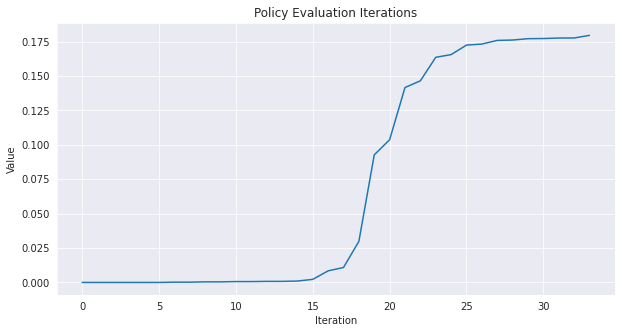

In [ ]:
env = FrozenLakeEnv()
best_gamma = 0.9
best_reward_type = 'sparse'

policy_iter = PolicyIteration(env, best_gamma, reward_type=best_reward_type)
policy_iter.run_iteration()

terminated = False
current_state = env.reset()
print(f"\nPath: {current_state}", end='')
while not terminated:
  print(f" -> ", end='')
  next_action = policy_iter.Pi[current_state]
  print(f"{env.action_name(next_action)} -> ", end='')
  current_state, sparse_r, dense_r, terminated = env.step(next_action)
  print(f"{current_state}", end='')
print(f" ({'Won' if current_state == env.goal_state else 'Lost'})\n")
  

In [ ]:
print(f"Average Time Per Iteration: {policy_iter.timestamps[len(policy_iter.timestamps)-1]/policy_iter.num_iterations}")
print(f"Time Elapsed After Each Iteration: {policy_iter.timestamps}")

Average Time Per Iteration: 0.011151393254597982
Time Elapsed After Each Iteration: [0.01686692237854004, 0.028957366943359375, 0.033454179763793945]


## 1.2.5

The (sparse, 0.5) algorithm took 0.014609336853027344 seconds.
The (sparse, 0.9) algorithm took 0.0221402645111084 seconds.
The (sparse, 0.99) algorithm took 0.02742314338684082 seconds.
The (dense, 0.5) algorithm took 0.024066925048828125 seconds.
The (dense, 0.9) algorithm took 0.03500008583068848 seconds.
The (dense, 0.99) algorithm took 0.06733441352844238 seconds.


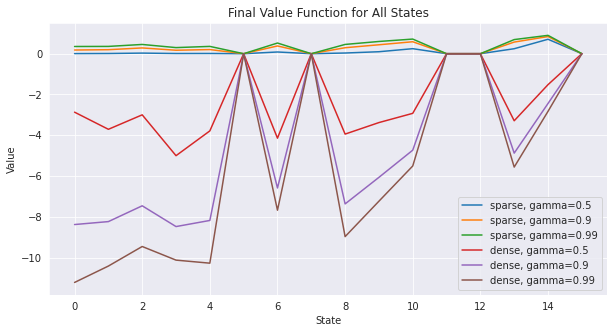

In [ ]:
IterationAlgo = PolicyIteration
env = FrozenLakeEnv()

plt.title(f"Final Value Function for All States")

for reward_type in ['sparse', 'dense']:
  for gamma in [0.5, 0.9, 0.99]:
    iter_algo = IterationAlgo(env, gamma, reward_type=reward_type, verbose=False)
    iter_algo.run_iteration()
    plt.plot(range(len(iter_algo.history[-1])), list(iter_algo.history[-1].values()), label=f"{reward_type}, gamma={gamma}")
    plt.xlabel('State')
    plt.ylabel('Value')

plt.legend()
plt.show()

# 1.3 Value Iteration Implementation

## 1.3.1 Value Iteration Algorithm

In [ ]:
class ValueIteration:
    def __init__(self, env, gamma, reward_type='dense', verbose=True):
        # initialize the domain and discount factor 
        self.env = env
        self.gamma = gamma
        self.reward_function = self.env.dense_reward if reward_type=='dense' else self.env.sparse_reward
        self.history = []
        self.reward_type = reward_type
        self.verbose = verbose
        self.timestamps = []
        
    ## dictionary data form for value table recommended, but feel free to use any format for v
    def initialize_values(self):
        # you need to initialize the value function V_0[s] = 0 for all states
        # implement V as a dictionary that maps states to values - this will guarantee constant-time reading and writing

        self.V_old = {}
        self.V = {state:0 for state in self.env.states_space()}


    def compute_backup(self, state, action):
        # use this as a helper function to return the necessaryquantity E{R(s, a, S’) + gamma * V_k[S’]} in value iteration
        backup = [self.env.pr(state, action, next_state)*(self.reward_function(state, action, next_state) + self.gamma*self.V_old[next_state]) \
          for next_state in self.env.states_space()]
        return sum(backup)
      
      
    def greedy_action(self, state):
        # use the previous function compute_backup to return the (deterministic) greedy policy pi[a | s] derived from V
        buffer = []
        for action in self.env.actions_space(state):
          buffer.append((action, self.compute_backup(state, action)))
        return max(buffer, key=lambda x: x[1])
      

    def update_values(self):
        # this method updates the value function for one iteration., e.g. V_{k}[s] -> V_{k+1}[s] over all s
        # it's helpful that we have V stored as one entity of value iteration object(again, just a recommendation)
        self.history.append(self.V.copy())
        self.V_old = self.V.copy()
        
    def run_iteration(self, tolerance=1e-6):
        # use this to implement the complete value iteration
        # algorithm - you should make use of the procedures initialize_values and update_values that you have written above
        # stop your iterations when the difference between V_{k+1} (self.V) and V_k (self.V_old) is less than tolerance
        # this method does not need to return anything since the
        # final V_k should be in self.V
        # store , and when converged plot , the backed -up value
        # function at the initial state of the MDP according to
        # the greedy policy derived from V_k as a function of k
        # also, print the final greedy policy in the console ...

      start_time = time.time()

      self.initialize_values()
      delta = float('inf')
      while delta > tolerance:
        delta = 0
        self.update_values()
        for state in self.env.states_space():
          if state in self.env.terminal_states:
            continue
          self.V[state] = self.greedy_action(state)[1]
          delta = max(delta, abs(self.V[state]-self.V_old[state]))
        self.timestamps.append(time.time() - start_time)

      end_time = time.time()
      print(f"The ({self.reward_type}, {self.gamma}) algorithm took {end_time-start_time} seconds.")

      if self.verbose:
        plt.plot(range(len(self.history)), [x[0] for x in self.history], label=f"Gamma {self.gamma}")
        plt.title('Value Iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Value')
        for state in self.env.states_space():
          if state in self.env.terminal_states:
            continue
          print(f'pi({state}) = {self.env.action_name(self.greedy_action(state)[0])}')
        print(f"The algorithm converged in {len(self.history)} iterations.")

## 1.3.2 

Reward Type is sparse, Gamma is 0.9
The (sparse, 0.9) algorithm took 0.057030439376831055 seconds.
pi(0) = down
pi(1) = right
pi(2) = down
pi(3) = left
pi(4) = down
pi(6) = down
pi(8) = right
pi(9) = right
pi(10) = down
pi(13) = right
pi(14) = right
The algorithm converged in 31 iterations.
-=-=-=-=-=-=-=-=-=-=-=-

Reward Type is sparse, Gamma is 0.99
The (sparse, 0.99) algorithm took 0.07720041275024414 seconds.
pi(0) = down
pi(1) = right
pi(2) = down
pi(3) = left
pi(4) = down
pi(6) = down
pi(8) = right
pi(9) = right
pi(10) = down
pi(13) = right
pi(14) = right
The algorithm converged in 37 iterations.
-=-=-=-=-=-=-=-=-=-=-=-



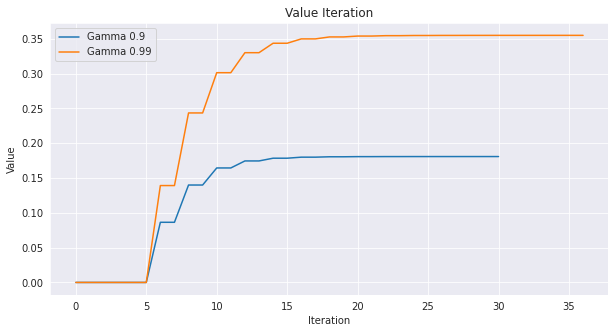

Reward Type is dense, Gamma is 0.9
The (dense, 0.9) algorithm took 0.07451343536376953 seconds.
pi(0) = down
pi(1) = right
pi(2) = down
pi(3) = left
pi(4) = down
pi(6) = down
pi(8) = right
pi(9) = right
pi(10) = down
pi(13) = right
pi(14) = right
The algorithm converged in 34 iterations.
-=-=-=-=-=-=-=-=-=-=-=-

Reward Type is dense, Gamma is 0.99
The (dense, 0.99) algorithm took 0.07346987724304199 seconds.
pi(0) = down
pi(1) = down
pi(2) = down
pi(3) = down
pi(4) = down
pi(6) = down
pi(8) = right
pi(9) = right
pi(10) = down
pi(13) = right
pi(14) = right
The algorithm converged in 39 iterations.
-=-=-=-=-=-=-=-=-=-=-=-



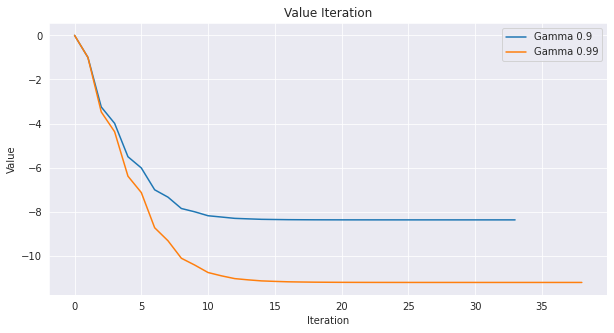

In [ ]:
env = FrozenLakeEnv()
for reward_type in ['sparse', 'dense']:
  plt.figure()
  plt.title(f"Reward Type is {reward_type} for State 0")
  for gamma in [0.9, 0.99]:
    print(f"Reward Type is {reward_type}, Gamma is {gamma}")
    value_iter = ValueIteration(env, gamma, reward_type=reward_type)
    value_iter.run_iteration()
    print("-=-=-=-=-=-=-=-=-=-=-=-\n")
  plt.legend()
  plt.show()

## 1.3.3

The algorithms converged in the following iterations:

Sparse & 0.9: 31 iterations in 0.05703 seconds.

Sparse & 0.99: 37 iterations in 0.07720 seconds.

Dense & 0.9: 34 iterations in 0.07451 seconds.

Dense & 0.99: 39 iterations in 0.07346 seconds.

Therefore, the fastest algorithm to convergence, based on number of iterations and runtime, used the sparse reward function and had gamma = 0.9. The sparse reward function is a more natural definition of the problem as it does not penalize based on path length and does not depend on arbitrary values chosen for a step taken and terminal state, as defined in the dense reward function. The lower discount factor allows for a faster convergence as it focuses less on the future states and so results in a lower number of iterations overall. This could be intuitively thought of as being due to the fact that when we have a high discount factor, every future state update requires a more significant update of the preceding states for every iteration, increasing the time it needs to achieve stability and convergence.

## 1.3.4

The (sparse, 0.9) algorithm took 0.06158256530761719 seconds.
pi(0) = down
pi(1) = right
pi(2) = down
pi(3) = left
pi(4) = down
pi(6) = down
pi(8) = right
pi(9) = right
pi(10) = down
pi(13) = right
pi(14) = right
The algorithm converged in 31 iterations.

Path: 0 -> down -> 1 -> right -> 2 -> down -> 6 -> down -> 10 -> down -> 14 -> right -> 15 (Won)

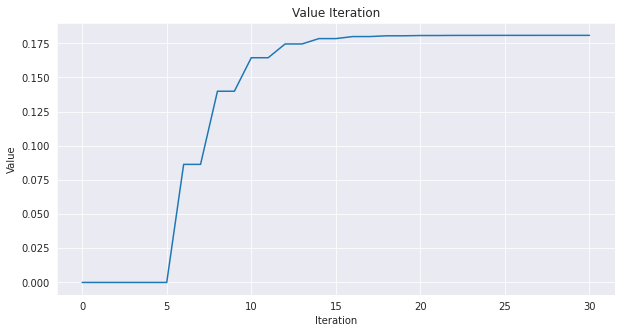

In [ ]:
env = FrozenLakeEnv()
best_reward_type ='sparse'
best_gamma = 0.9

value_iter = ValueIteration(env, best_gamma, reward_type=best_reward_type)
value_iter.run_iteration()

terminated = False
current_state = env.reset()
print(f"\nPath: {current_state}", end='')
while not terminated:
  print(f" -> ", end='')
  next_action = value_iter.greedy_action(current_state)[0]
  print(f"{env.action_name(next_action)} -> ", end='')
  current_state, sparse_r, dense_r, terminated = env.step(next_action)
  print(f"{current_state}", end='')
print(f" ({'Won' if current_state == env.goal_state else 'Lost'})", end='')
  

In [ ]:
print(f"Average Time Per Iteration: {value_iter.timestamps[len(value_iter.timestamps)-1]/len(value_iter.history)}")
print(f"Time Elapsed After Each Iteration: {value_iter.timestamps}")

Average Time Per Iteration: 0.0019865112919961255
Time Elapsed After Each Iteration: [0.005735874176025391, 0.008542537689208984, 0.011100053787231445, 0.013670206069946289, 0.016375064849853516, 0.018188953399658203, 0.019995450973510742, 0.021792888641357422, 0.023563146591186523, 0.025325536727905273, 0.027045488357543945, 0.0287933349609375, 0.030515193939208984, 0.032234907150268555, 0.034012556076049805, 0.03572535514831543, 0.037450551986694336, 0.03916001319885254, 0.040879249572753906, 0.042578935623168945, 0.04427671432495117, 0.046065330505371094, 0.04777836799621582, 0.04949188232421875, 0.05119824409484863, 0.05290412902832031, 0.05462479591369629, 0.05634260177612305, 0.0580599308013916, 0.059783220291137695, 0.06158185005187988]


## 1.3.5

The (sparse, 0.5) algorithm took 0.052977800369262695 seconds.
The (sparse, 0.9) algorithm took 0.10790705680847168 seconds.
The (sparse, 0.99) algorithm took 0.12017655372619629 seconds.
The (dense, 0.5) algorithm took 0.06226515769958496 seconds.
The (dense, 0.9) algorithm took 0.0989844799041748 seconds.
The (dense, 0.99) algorithm took 0.19762778282165527 seconds.


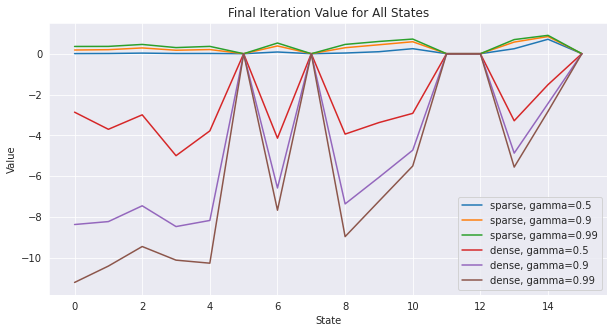

In [ ]:
IterationAlgo = ValueIteration
env = FrozenLakeEnv()

plt.title(f"Final Iteration Value for All States")

for reward_type in ['sparse', 'dense']:
  for gamma in [0.5, 0.9, 0.99]:
    iter_algo = IterationAlgo(env, gamma, reward_type=reward_type, verbose=False)
    iter_algo.run_iteration()
    plt.plot(range(len(iter_algo.history[-1])), list(iter_algo.history[-1].values()), label=f"{reward_type}, gamma={gamma}")
    plt.xlabel('State')
    plt.ylabel('Value')

plt.legend()
plt.show()

# 1.4: Comparing Algorithms

## Memory and Time Consumption

### PolicyIteration's `run_iteration` function
`run_iteration` runs `n` times where `n` is the number of iterations it takes until the policy does not change between iterations.

For each iteration within `n`:

1. `policy_evaluation` is run once but loops `m` times where `m` is the number of iterations it computes until `delta <= tolerance`.
2. `update_values` is run and adds a full `V` for all 16 states into `history`.
3. `policy_improvement` is run once, which goes through the entire state space and calculates the `greedy_action` for each state. `greedy_action` runs through the action space for that state once.

<!-- Overall, the `run_iteration` algorithm for `PolicyIteration` is `O(n*m)` for time and `O(n)` for memory. -->
Each iteration of the policy iteration algorithm is $O(|S|^3+|S|^2|A|)$ in terms of time complexity, while in terms of memory, we need to keep at least two arrays (one for the value and for the policy), where the size of each is a function of the state space


### ValueIteration's `run_iteration` Function
`run_iteration` runs `n` times where `n` is the number of iterations it takes until `delta <= tolerance`.

For each iteration within `n`:

1. `update_values` is run and adds a full `V` for all 16 states into `history`.
2. Iterates through the entire state space and calculates the `greedy_action` for each state. `greedy_action` runs through the action space for that state once.

<!-- Ovreall, the `run_iteration` algorithm for `ValueIteration` is `O(n)` for time and `O(n)` for memory. -->
Each iteration of the policy iteration algorithm is $O(|S|^2|A|)$ in terms of time complexity, while in terms of memory, we need to keep at least one array (for the value function), where the size of that array is a function of the state space

### Analysis

Both `PolicyIteration` and `ValueIteration`'s best discount factor and reward function were sparse and 0.9. When compared, `PolicyIteration` was quicker than `ValueIteration` (0.03345 seconds vs. 0.06158 seconds) and required fewer iterations of `n` (3 iterations vs. 31 iterations). 

| Algo             | Memory | Average Time per Iteration |  # of Iterations | Overall Time |
|------------------|--------|--------------------|--------------|--------------|
| Policy Iteration |Higher| 0.0111 seconds | 3 Iterations | (0.0334s) Lower |
| Value Iteration  |Lower | 0.00198 seconds | 31 Iterations | (0.06158s) Higher |


# Download to .html File

In [ ]:
%%shell
jupyter nbconvert --to html FrozenLake_DP_final.ipynb

[NbConvertApp] Converting notebook FrozenLake_DP_final.ipynb to html
[NbConvertApp] Writing 731010 bytes to FrozenLake_DP_final.html
